In [14]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import math

In [15]:
df =pd.read_csv('SaccharomycesCerevisiaeS288C_binary_hq.txt',sep='\t',usecols=['Uniprot_A','Uniprot_B'])

In [16]:
df

,Uniprot_A,Uniprot_B
0,A0A023PYF7,P39743
1,A0A250W8A7,A0A250W8A7
2,A0A250WL92,A0A250WL92
3,A2P2R3,P04821
4,A2P2R3,P38753
...,...,...
23197,Q99312,Q99312
23198,Q99315,Q99315
23199,Q99380,Q99380
23200,Q99385,Q99385


In [17]:
G=nx.from_pandas_edgelist(df,'Uniprot_A','Uniprot_B',create_using=nx.DiGraph())

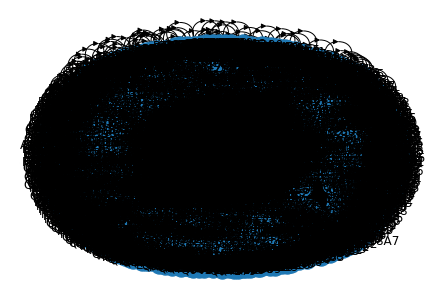

In [18]:
nx.draw(G,with_labels=True)

In [19]:
# visualize to each protein and its degree
degrees=dict(G.degree)
order=sorted(degrees.items(),key=lambda t :t[1])

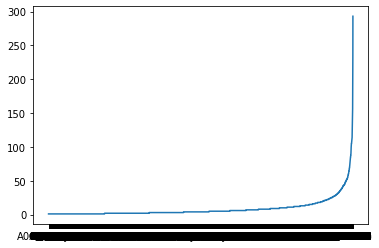

In [20]:
x,y=zip(*order)
plt.plot(x,y)
plt.show()

<BarContainer object of 293 artists>

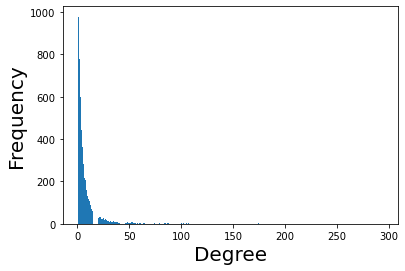

In [21]:
# frequency for Degrees of proteins
degree_sequence = [G.degree(n) for n in G.nodes]
degree_counts = Counter(degree_sequence)
min_degree, max_degree = min(degree_counts.keys()), max(degree_counts.keys())
plt.xlabel("Degree", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plot_x = list(range(min_degree, max_degree + 1))
plot_y = [degree_counts.get(x, 0) for x in plot_x]
plt.bar(plot_x, plot_y)

In [22]:
# Degree Distribution to know hubs (little proteins have high Degree)

def plot_degree_dist(G):
    
    degrees = G.degree()
    degrees = dict(degrees)
    values = sorted(set(degrees.values()))
   
    histo = [list(degrees.values()).count(x) for x in values]
    P_k = [x / G.order() for x in histo]
   
    
    plt.figure()
    plt.bar(values, P_k)
    plt.xlabel("k",fontsize=20)
    plt.ylabel("p(k)", fontsize=20)
    plt.title("Degree Distribution", fontsize=20)
    
    plt.show()
    plt.figure()
    plt.grid(False)
    plt.loglog(values, P_k, "b+")
    plt.xlabel("k", fontsize=20)
    plt.ylabel("log p(k)", fontsize=20)
    plt.title("log Degree Distribution")
    plt.show()
    plt.show()  

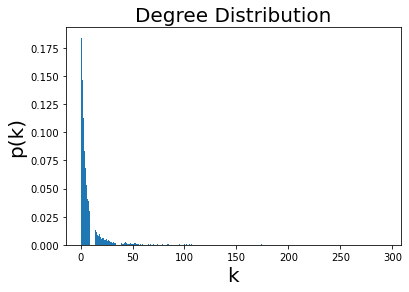

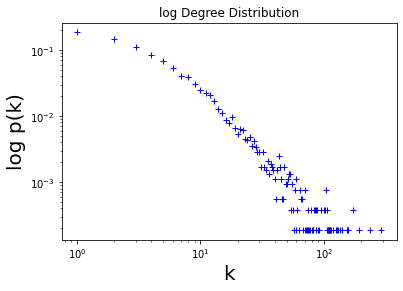

In [23]:
plot_degree_dist(G)

In [24]:
# 5% from sorted degree (hubs)
len(order)*5/100

265.65

In [25]:
hubs=[]
for i in range(len(order)-1,len(order)-80,-1):
    hubs.append(order[i][0])

In [26]:
hubs

['P47135',
 'P00546',
 'P02829',
 'P38822',
 'P39940',
 'Q12306',
 'Q02821',
 'Q02724',
 'Q02630',
 'P38264',
 'P32790',
 'Q06410',
 'Q12349',
 'P43603',
 'P33122',
 'P32569',
 'P33895',
 'P33420',
 'Q06629',
 'P38236',
 'P33203',
 'P32364',
 'P29055',
 'P39723',
 'P34237',
 'P32502',
 'P32457',
 'P25344',
 'P38286',
 'P40054',
 'P39013',
 'P32366',
 'P40537',
 'P40014',
 'P32793',
 'Q02574',
 'P22209',
 'Q04439',
 'P40061',
 'P36022',
 'Q02732',
 'P40582',
 'P39743',
 'P33297',
 'P40318',
 'P40319',
 'P38987',
 'P40073',
 'Q06208',
 'Q12080',
 'P47149',
 'P47068',
 'P80667',
 'Q04477',
 'P53253',
 'P10614',
 'P38633',
 'P35817',
 'P42944',
 'P53045',
 'P22696',
 'P43582',
 'P39929',
 'Q07824',
 'Q03860',
 'P25358',
 'P46679',
 'Q04697',
 'P38842',
 'P27637',
 'P46961',
 'Q05080',
 'P40971',
 'P39547',
 'P19807',
 'P49018',
 'Q02795',
 'P53278',
 'Q06568']